# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 設定 data_path
dir_data = './data/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [5]:
# Observe data
app_train.groupby(['CNT_CHILDREN']).size()

CNT_CHILDREN
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
8          2
9          2
10         2
11         1
12         2
14         3
19         2
dtype: int64

In [7]:
#1
"""
Your code here
"""
cut_rule = [-1, 0, 2, 5, app_train['CNT_CHILDREN'].max()]

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 0.0]    215371
(0.0, 2.0]        87868
(2.0, 5.0]         4230
(5.0, 19.0]          42
Name: CNT_CHILDREN_GROUP, dtype: int64

In [12]:
# app_train['CNT_CHILDREN'].values 會 return 一個 Series
app_train['CNT_CHILDREN'].values

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [14]:
# app_train['CNT_CHILDREN_GROUP'] return 1 個 Series, 內容是 4 categories
app_train['CNT_CHILDREN_GROUP']

0         (-1.001, 0.0]
1         (-1.001, 0.0]
2         (-1.001, 0.0]
3         (-1.001, 0.0]
4         (-1.001, 0.0]
5         (-1.001, 0.0]
6            (0.0, 2.0]
7         (-1.001, 0.0]
8         (-1.001, 0.0]
9         (-1.001, 0.0]
10           (0.0, 2.0]
11        (-1.001, 0.0]
12        (-1.001, 0.0]
13           (0.0, 2.0]
14        (-1.001, 0.0]
15        (-1.001, 0.0]
16        (-1.001, 0.0]
17           (0.0, 2.0]
18        (-1.001, 0.0]
19           (0.0, 2.0]
20        (-1.001, 0.0]
21           (0.0, 2.0]
22           (0.0, 2.0]
23        (-1.001, 0.0]
24           (0.0, 2.0]
25        (-1.001, 0.0]
26        (-1.001, 0.0]
27           (0.0, 2.0]
28        (-1.001, 0.0]
29        (-1.001, 0.0]
              ...      
307481    (-1.001, 0.0]
307482    (-1.001, 0.0]
307483    (-1.001, 0.0]
307484    (-1.001, 0.0]
307485       (0.0, 2.0]
307486       (0.0, 2.0]
307487    (-1.001, 0.0]
307488    (-1.001, 0.0]
307489    (-1.001, 0.0]
307490    (-1.001, 0.0]
307491       (0.

In [15]:
# Erwin
# pd.cut 之後, 新增了 1 個 column : app_train['CNT_CHILDREN_GROUP']
# (-1, 0] 表示包含 0, 所以 rule 要從 -1 開始

In [16]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP
(-1.001, 0.0]    166288.713566
(0.0, 2.0]       174725.712648
(2.0, 5.0]       173626.303191
(5.0, 19.0]      147910.714286
Name: AMT_INCOME_TOTAL, dtype: float64

In [17]:
# Erwin: 5 個小孩以上的平均收入較低?

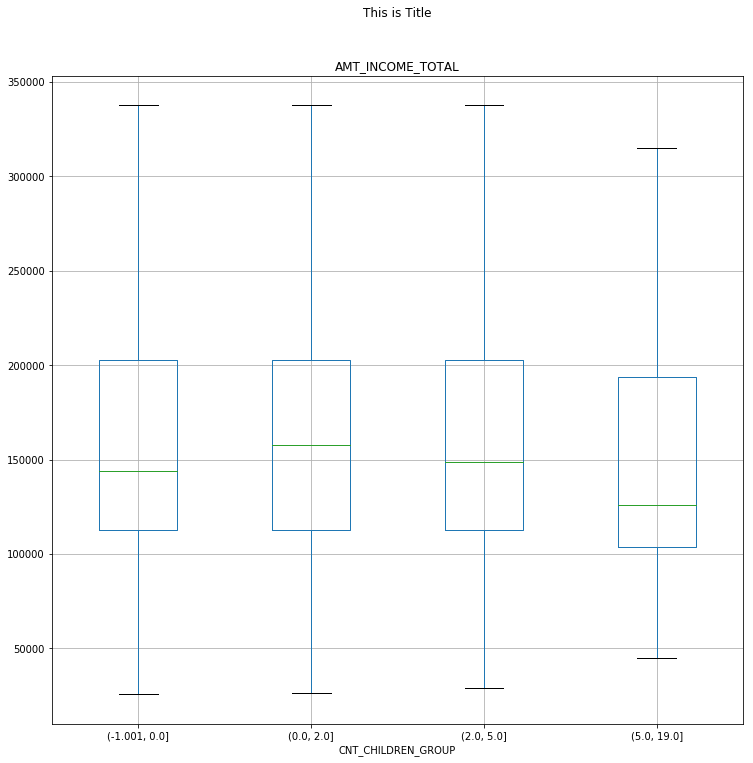

In [20]:
#2-2
"""
Your code here
"""
plt_column = 'AMT_INCOME_TOTAL'
plt_by = 'CNT_CHILDREN_GROUP'

app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('This is Title')
plt.show()

In [23]:
#3
"""
Your code here
"""

grp = ['CNT_CHILDREN_GROUP']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']

app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x: (x-x.mean())/x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.345856
1,270000.0,0.990553
2,67500.0,-0.943538
3,135000.0,-0.298841
4,121500.0,-0.427780


In [24]:
app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].describe()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
count,3.075110e+05,3.075110e+05
mean,1.687979e+05,1.279586e-16
std,2.371231e+05,9.999951e-01
min,2.565000e+04,-1.413873e+00
25%,1.125000e+05,-4.277800e-01
50%,1.471500e+05,-9.656432e-02
75%,2.025000e+05,1.768980e-01
max,1.170000e+08,2.839761e+02
